# Лабораторная работа №4. Синтез КИХ-фильтров.
Лаборатория цифровой обработки сигналов, МФТИ

Вклад задач в итоговую оценку: 1.1-3.2 — 1 балл, 4.1 — 2 балла. Максимальная оценка ограничивается с момента наступления срока сдачи следующей лабораторной работы.

В названии файла заменить `familyname` на свою фамилию. 

In [1108]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal
import matplotlib.ticker as ticker

%matplotlib widget


In [1109]:
def CausalImpulseResponse(N, h):
    plt.figure(figsize=[8, 3])
    ax = plt.axes()
    ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1))
    plt.stem(np.arange(N), h)
    plt.xlabel('$k$')
    plt.ylabel('$h[k]$')
    plt.title("Каузальная импульсная характеристика")
    plt.grid()

def GroupDelay(h, delta = 1e-6):
    nu, gd = signal.group_delay((h, [1]), w=np.linspace(-0.5+delta, 0.5-delta, num=2048), fs=1)

    plt.figure(figsize=[8, 3])
    plt.title('Групповая задержка фильтра')
    plt.plot(nu, gd*1, 'C3')
    plt.ylabel('$\\tau_{{гр}}, c$')
    plt.xlabel('Нормированная частота, $\\nu$')
    plt.ylim([min(gd)-1, max(gd)+1])
    plt.xticks(np.linspace(-0.5, 0.5, 11))
    plt.grid()
    plt.tight_layout()

def PhaseDelay(h, M):
    plt.figure(figsize=[8, 3])
    ax = plt.subplot(111)
    H1=((np.fft.fft(h, M)))
    plt.plot(np.arange(M)/M, np.unwrap(np.angle(H1)), color='C2')
    plt.title("ФЧХ (с разверткой на $2\\pi$)")
    ax.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
    plt.xlim([0, 1])
    plt.yticks([-np.pi, 0, np.pi], labels=("$-\\pi$", "0", "$\\pi$"))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(base=np.pi))
    plt.xlabel('$\\nu$')
    plt.ylabel('ФЧХ, $\\varphi(\\nu), рад$')
    plt.grid()


|      Вариант                                                                  | 1    | 2    | 3    |      4 | 5    | 6    | 7    | 8    | 9    | 10   | 11   | 12   | 13   | 14   | 15   | 16   | 17   | 18   | 19   | 20   |
|:-----------------------------------------------------------------------|:-----|:-----|:-----|:-------|:-----|:-----|:-----|:-----|:-----|:-----|:-----|:-----|:-----|:-----|:-----|:-----|:-----|:-----|:-----|:-----|
| Частота  дискретизации $f_s$, кГц                                      | 100  | 100  | 100  | 100    | 100  | 200  | 200  | 200  | 200  | 200  | 100  | 100  | 100  | 100  | 100  | 200  | 200  | 200  | 200  | 200  |
| Граничная частота полосы пропускания $f_1$, кГц                        | 10   | 9    | 11   |  12    | 15   | 20   | 21   | 23   | 24   | 25   | 9    | 10   | 11   | 12   | 13   | 26   | 27   | 28   | 29   | 30   |
| Граничная частота полосы задерживания $f_2$, кГц                        | 12   | 11   | 13   |  14    | 17   | 22   | 23   | 25   | 26   | 27   | 11   | 12   | 13   | 14   | 15   | 28   | 29   | 30   | 31   | 32   |
| Максимально допустимое отклонение АЧХ в полосе пропускания $\delta_1$  | 0.05 | 0.06 | 0.04 |   0.05 | 0.04 | 0.05 | 0.06 | 0.04 | 0.05 | 0.04 | 0.05 | 0.06 | 0.04 | 0.05 | 0.04 | 0.05 | 0.06 | 0.04 | 0.05 | 0.04 |
| Максимально допустимое отклонение АЧХ в полосе задерживания $\delta_2$ | 0.02 | 0.03 | 0.01 |   0.02 | 0.02 | 0.03 | 0.03 | 0.02 | 0.03 | 0.03 | 0.03 | 0.02 | 0.03 | 0.02 | 0.02 | 0.03 | 0.03 | 0.02 | 0.02 | 0.02 |
| Несущая частота $f_0$, кГц                                             | 3,9  | 3,8  | 3,9  |   4    | 4,6  | 5,9  | 6,5  | 6,7  | 8,1  | 7,4  | 4,5  | 5,1  | 4,3  | 5,2  | 5,3  | 5,7  | 8,2  | 9,1  | 8,7  | 9,5  |

In [1110]:
fs = 200 * 1e3
f1 = 25 * 1e3
f2 = 27 * 1e3
delta1 = 0.04
delta2 = 0.03
f0 = 7.4 * 1e3


# Модуль 1. Метод частотной выборки синтеза КИХ-фильтров

## Задача 1.1. Синтез ФНЧ по идеальной АЧХ. 

Синтезировать КИХ-фильтр 28 порядка ($N=29$) на основе идеального фильтра нижних частот с частотой среза $f_c=(f_1+f_2)/2$ методом частотной выборки. Частоту дискретизации принять равной $f_s$.

а) Определить максимальные уровни пульсаций $\delta_1$ и $\delta_2$ в полосе пропускания и в полосе задерживания. 

б) Изобразить на одном графике АЧХ фильтра и отсчеты ДПФ. 

в) Построить импульсную характеристику КИХ-фильтра. Определить по виду импульсной характеристики, будет ли фильтр обладать постоянной фазовой и группой задержками.

г) Получить график для групповой задержки фильтра. Сравнить с выводом в пункте (в).

In [1111]:
def ideal_lowpass(f, fc, fs):
    if 0 <= f <= fc or fs-fc <= f <= fs:
        return 1.0 + 0.0j
    else:
        return 0.0 + 0.0j


In [1112]:
N = 29
fc = (f1 + f2) / 2

H = np.zeros(N, dtype=complex)
for n in range(N):
    H[n] = ideal_lowpass(f = fs * n / N, fc = fc, fs = fs)


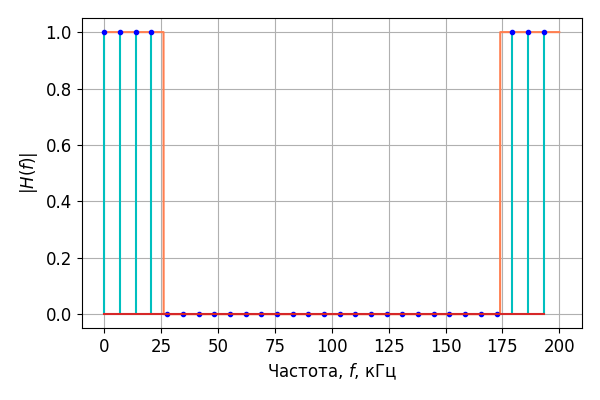

In [1113]:
f_range = np.linspace(0, fs, 20480)

plt.figure(figsize=[6, 4])
plt.plot(f_range / 1e3, [abs(ideal_lowpass(f, fc = fc, fs = fs)) for f in f_range], color='coral')
plt.stem(fs*np.arange(N)/N / 1e3, abs(H), linefmt='c', markerfmt='b.')
plt.xlabel('Частота, $f$, кГц')
plt.ylabel('$|H(f)|$')
plt.tight_layout()
plt.grid()


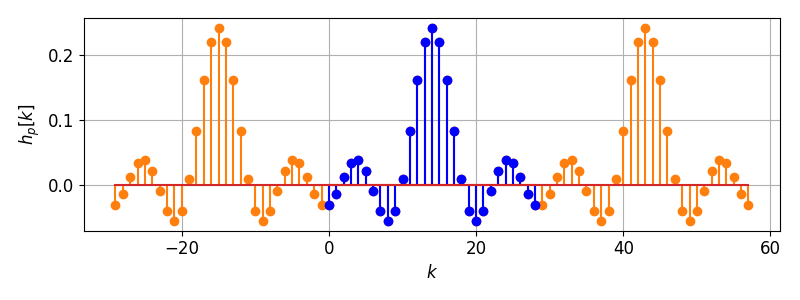

In [1114]:
h=np.fft.ifft(H).real
h=np.roll(h, N//2)

h3=np.concatenate((h, h, h))
plt.figure(figsize=[8, 3])
plt.stem(np.arange(3*N)-N, h3, linefmt='C1', markerfmt='C1o')
plt.stem(np.arange(N), h, linefmt='b', markerfmt='bo')
plt.xlabel('$k$')
plt.ylabel('$h_p[k]$')
plt.grid()
plt.tight_layout()


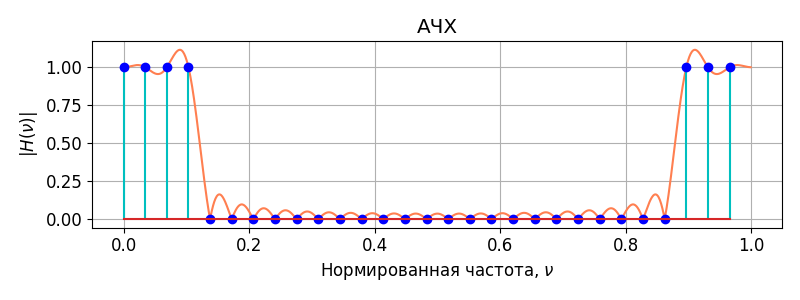

In [1115]:
M=1024
H1=abs(np.fft.fft(h, M))

plt.figure(figsize=[8, 3])
plt.plot(np.arange(M)/M, H1, color='coral')
plt.stem(np.arange(N)/N, abs(np.fft.fft(h)), linefmt='c', markerfmt='bo')
plt.grid()
plt.ylabel('$|H(\\nu)|$')
plt.xlabel('Нормированная частота, $\\nu$')
plt.title('АЧХ')
plt.tight_layout()


In [1116]:
w = np.arange(M) / M
nu1 = f1 / fs
nu2 = f2 / fs

print(nu1, nu2)

d1 = np.max(np.abs(H1[w < nu1] - 1))
d2 = np.max(H1[np.where((nu2 <= w) & (w <= 0.5))])

print(d1, d2)


0.125 0.135
0.5885191535739931 0.1633807031254352


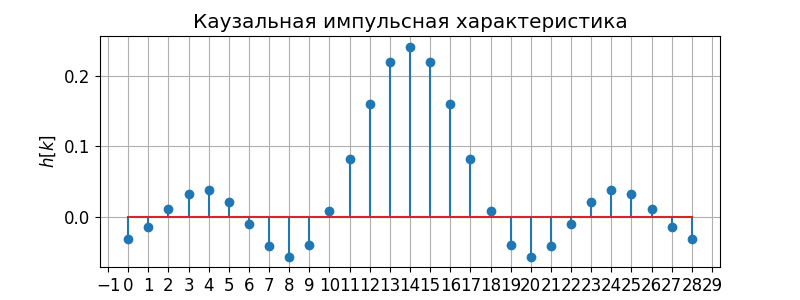

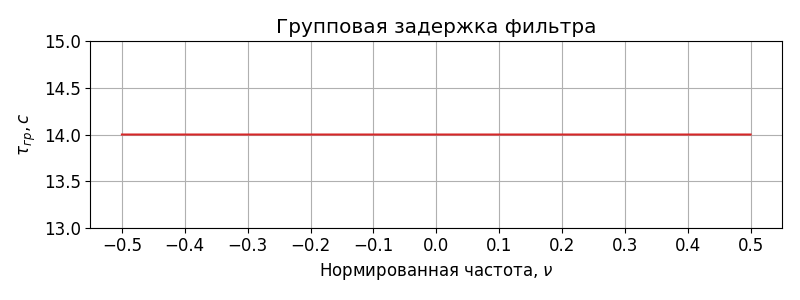

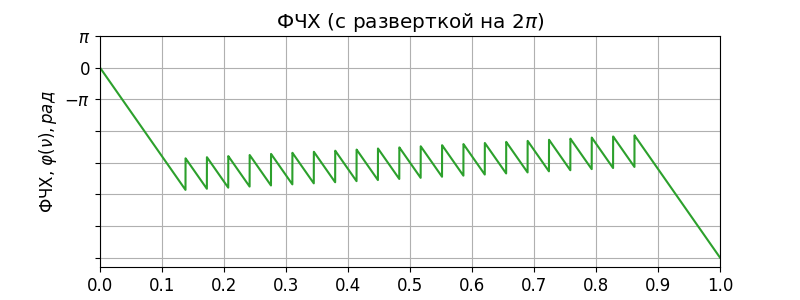

In [1117]:
CausalImpulseResponse(N, h)
GroupDelay(h)
PhaseDelay(h, 10240)


## Задача 1.2. Синтез ФНЧ по непрерывной АЧХ.

Синтезировать КИХ-фильтр 28 порядка ($N=29$) на основе идеального фильтра нижних частот с граничной частотой полосы пропускания $f_1$ и с граничной частотой полосы задерживания $f_2$ методом частотной выборки. Частоту дискретизации принять равной $f_s$. Частотную характеристику идеального фильтра в полосе перехода аппроксимировать линейной функцией так, чтобы характеристика была непрерывной.

а) Определить максимальные уровни пульсаций $\delta_1$ и $\delta_2$ в полосе пропускания и в полосе задерживания. Сравнить с результатом в задаче 1.1.

б) Изобразить на одном графике АЧХ фильтра и отсчеты ДПФ. 

в) Построить импульсную характеристику полученного КИХ-фильтра. Определить по виду импульсной характеристики, будет ли 
фильтр обладать постоянной фазовой и группой задержками.

г) Получить график для групповой задержки фильтра. Сравнить с выводом в пункте (в).

д) Определить частоту среза (по уровню $-3$ дБ) модельного и полученного фильтров. 

In [1118]:
def ideal_lowpass(f, f1, f2, fs):
    if 0 <= f <= f1 or fs-f1 <= f <= fs:
        return 1.0 + 0.0j
    elif f1 < f < f2:
        return f / (f1 - f2) + (f2 / (f2 - f1)) + 0.0j
    elif fs - f2 < f < fs - f1:
        return f / (f2 - f1) + (fs - f2) / (f1 - f2) + 0.0j
    else:
        return 0.0 +0.0j


In [1119]:
N = 29

H = np.zeros(N, dtype=complex)
for n in range(N):
    H[n] = ideal_lowpass(f = fs * n / N, f1 = f1, f2 = f2, fs = fs)


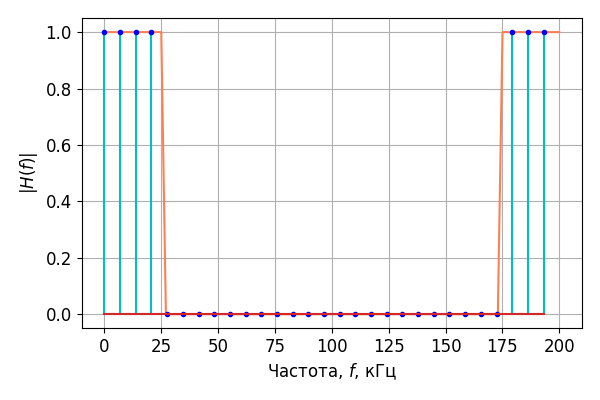

In [1120]:
f_range = np.linspace(0, fs, 20480)

plt.figure(figsize=[6, 4])
plt.plot(f_range / 1e3, [abs(ideal_lowpass(f, f1, f2, fs)) for f in f_range], color='coral')
plt.stem(fs*np.arange(N)/N / 1e3, abs(H), linefmt='c', markerfmt='b.')
plt.xlabel('Частота, $f$, кГц')
plt.ylabel('$|H(f)|$')
plt.tight_layout()
plt.grid()


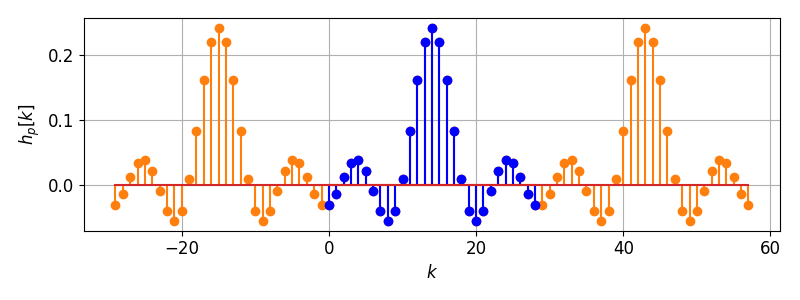

In [1121]:
h=np.fft.ifft(H).real
h=np.roll(h, N//2)

h3=np.concatenate((h, h, h))
plt.figure(figsize=[8, 3])
plt.stem(np.arange(3*N)-N, h3, linefmt='C1', markerfmt='C1o')
plt.stem(np.arange(N), h, linefmt='b', markerfmt='bo')
plt.xlabel('$k$')
plt.ylabel('$h_p[k]$')
plt.grid()
plt.tight_layout()


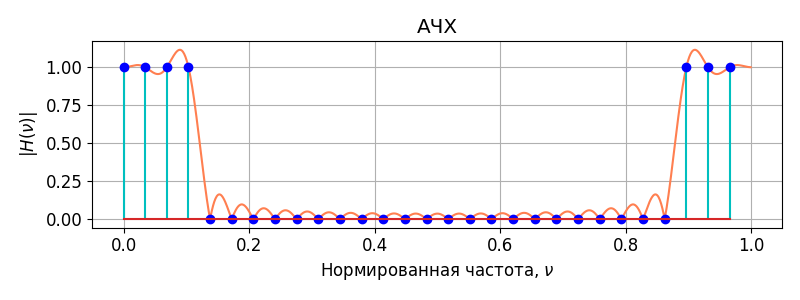

In [1122]:
M=1024
H1=abs(np.fft.fft(h, M))

plt.figure(figsize=[8, 3])
plt.plot(np.arange(M)/M, H1, color='coral')
plt.stem(np.arange(N)/N, abs(np.fft.fft(h)), linefmt='c', markerfmt='bo')
plt.grid()
plt.ylabel('$|H(\\nu)|$')
plt.xlabel('Нормированная частота, $\\nu$')
plt.title('АЧХ')
plt.tight_layout()


In [1123]:
w = np.arange(M) / M
nu1 = f1 / fs
nu2 = f2 / fs

print(nu1, nu2)

d1 = np.max(np.abs(H1[w < nu1] - 1))
d2 = np.max(H1[np.where((nu2 <= w) & (w <= 0.5))])

print(d1, d2)


0.125 0.135
0.5885191535739931 0.1633807031254352


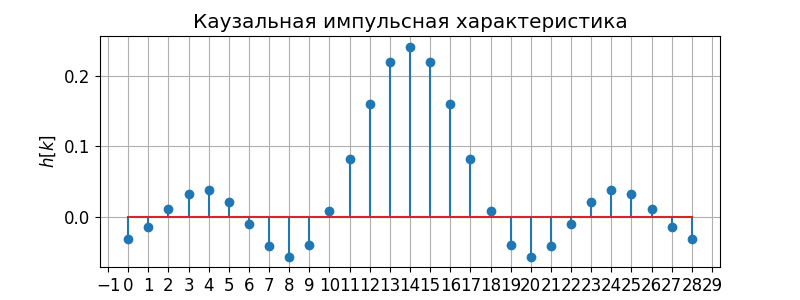

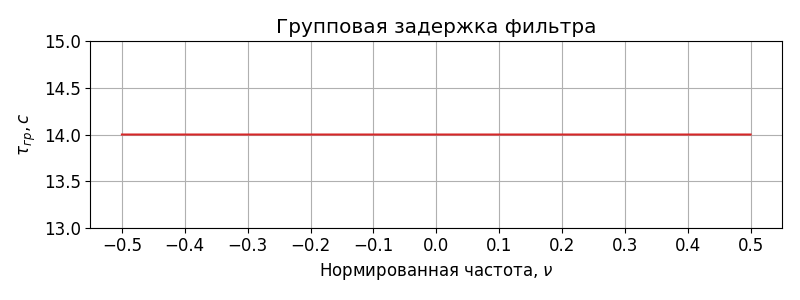

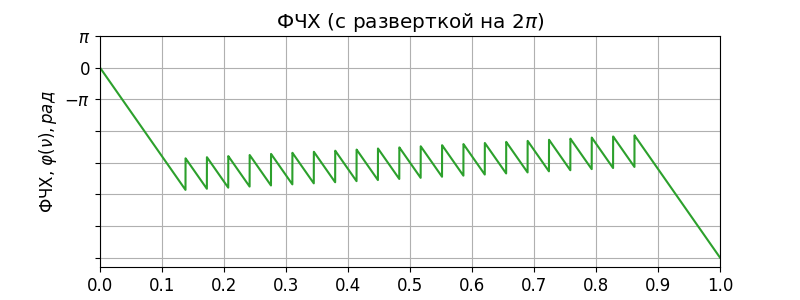

In [1124]:
CausalImpulseResponse(N, h)
GroupDelay(h)
PhaseDelay(h, 10240)


In [1125]:
M = 20480
f_range = np.linspace(0, fs, M)

H_mod = np.array([abs(ideal_lowpass(f, f1, f2, fs)) for f in f_range])
nu_mod = np.where(H_mod < (1 / 2**0.5))[0][0] / len(H_mod)

nu_calc = np.where(H1 < (1 / 2**0.5))[0][0] / len(H1)

print(nu_mod, nu_calc)


0.1279296875 0.115234375


## Задача 1.3. Синтез фильтра с характеристикой «приподнятый косинус»

Синтезировать КИХ-фильтр 28 порядка ($N=29$) с частотой среза $f_c=(f_1+f_2)/2$  на основе фильтра приподнятого косинуса методом частотной выборки. Частоту дискретизации принять равной $f_s$. На интервале $[-f_s/2, f_s/2]$ частотная характеристика фильтра задается следующим образом 

$$H(f)=\left\{ \begin{matrix}
   1, & |f| < (1-\beta)f_c;\\
   \dfrac{1}{2}*\left( 1+\cos \left(\pi \dfrac{|f|-(1-\beta)f_c}{2\beta f_c} \right) \right), & (1-\beta) f_c \le |f| \le (1+\beta)f_c;  \\
   0,   &  |f| > (1+\beta)f_c. \\
\end{matrix} \right.$$

а) Подобрать такое $\beta$, чтобы модельный фильтр не выходил за максимально допустимые отклонения АЧХ в полосе пропускания и в полосе задерживания ($\delta_1$ и $\delta_2$). Изобразить полученную АЧХ фильтра.

б) Для синтезированного фильтра определить максимальные уровни пульсаций $\delta_1$ и $\delta_2$ в полосе пропускания и в полосе задерживания. Сравнить с результатами в задаче 1.1 и задаче 1.2.

в) Изобразить на одном графике АЧХ фильтра и отсчеты ДПФ. 

г) Построить импульсную характеристику полученного КИХ-фильтра. Определить по виду импульсной характеристики, будет ли 
фильтр обладать постоянной фазовой и группой задержками.

д) Получить график для групповой задержки фильтра. Сравнить с выводом в пункте (г).

е) Определить частоту среза (по уровню $-3$ дБ) полученного фильтра. Сравнить с задачей 1.2.


In [1126]:
def ideal_lowpass(f, betta, fc, fs):
    if abs(f) < (1 - betta) * fc:
        return 1.0 + 0.0j
    elif (1 - betta) * fc <= abs(f) < (1 + betta) * fc:
        return 1 / 2 * (1 + np.cos(np.pi * (np.abs(f) - (1 - betta) * fc) / (2 * betta * fc)))
    else:
        return 0.0 +0.0j


In [1127]:
N = 29
fc = (f1 + f2) / 2
betta = 0.15

H = np.zeros(N, dtype=complex)
for n in range(-N//2, N//2):
    H[n] = ideal_lowpass(f = fs * n / N, betta = betta, fc = fc, fs = fs)


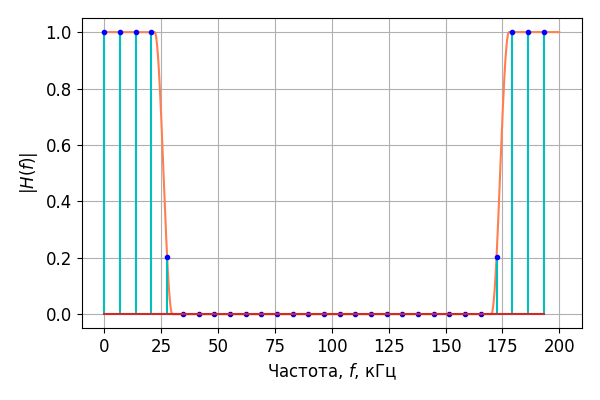

In [1128]:
M = 20480
f_range = np.linspace(-fs/2, fs/2, M)

H1 = [abs(ideal_lowpass(f, betta, fc, fs)) for f in f_range]
H1 = np.roll(H1, M//2)

plt.figure(figsize=[6, 4])
plt.plot(np.linspace(0, fs, M) / 1e3, H1, color='coral')
plt.stem(fs*np.arange(N)/N / 1e3, abs(H), linefmt='c', markerfmt='b.')
plt.xlabel('Частота, $f$, кГц')
plt.ylabel('$|H(f)|$')
plt.tight_layout()
plt.grid()


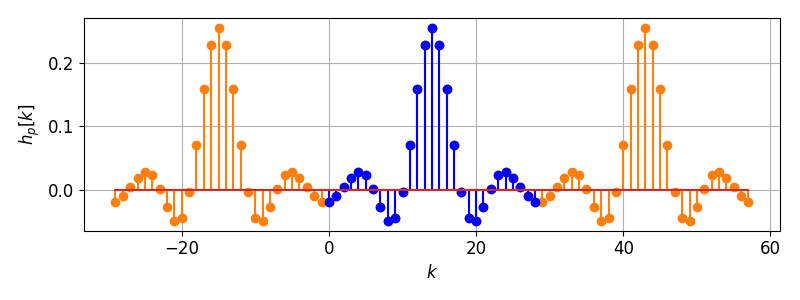

In [1129]:
h=np.fft.ifft(H).real
h=np.roll(h, N//2)

h3=np.concatenate((h, h, h))
plt.figure(figsize=[8, 3])
plt.stem(np.arange(3*N)-N, h3, linefmt='C1', markerfmt='C1o')
plt.stem(np.arange(N), h, linefmt='b', markerfmt='bo')
plt.xlabel('$k$')
plt.ylabel('$h_p[k]$')
plt.grid()
plt.tight_layout()


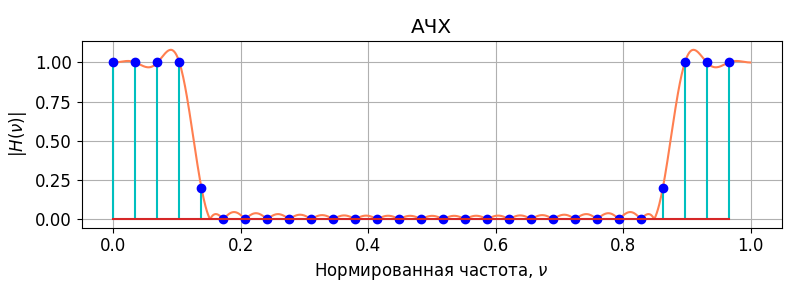

In [1130]:
M=1024
H1=abs(np.fft.fft(h, M))

plt.figure(figsize=[8, 3])
plt.plot(np.arange(M)/M, H1, color='coral')
plt.stem(np.arange(N)/N, abs(np.fft.fft(h)), linefmt='c', markerfmt='bo')
plt.grid()
plt.ylabel('$|H(\\nu)|$')
plt.xlabel('Нормированная частота, $\\nu$')
plt.title('АЧХ')
plt.tight_layout()


In [1131]:
w = np.arange(M) / M
nu1 = f1 / fs
nu2 = f2 / fs

print(nu1, nu2)

d1 = np.max(np.abs(H1[w < nu1] - 1))
d2 = np.max(H1[np.where((nu2 <= w) & (w <= 0.5))])

print(d1, d2)


0.125 0.135
0.4455138795382043 0.2506887170988068


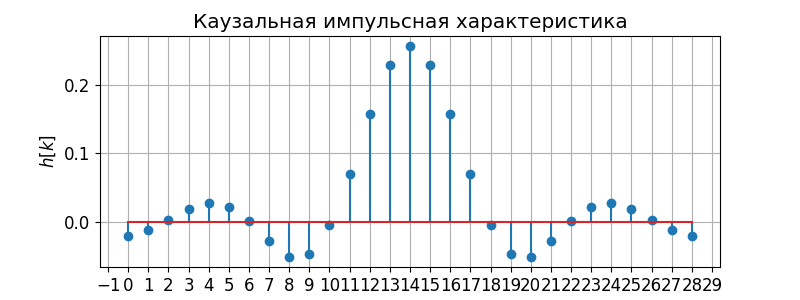

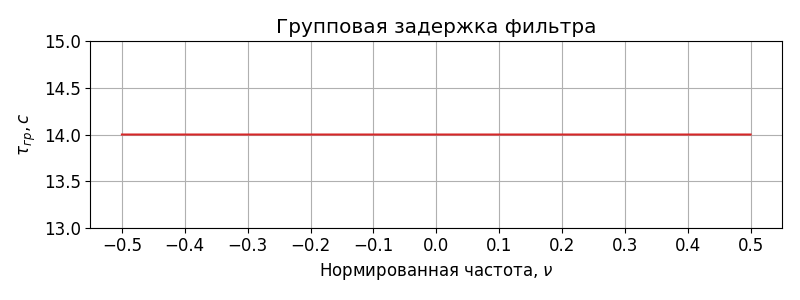

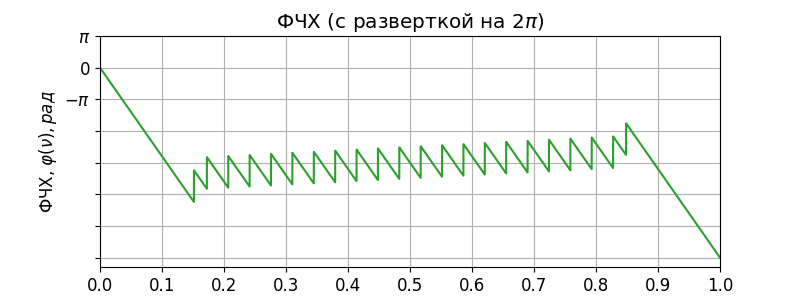

In [1132]:
CausalImpulseResponse(N, h)
GroupDelay(h)
PhaseDelay(h, 10240)


In [1133]:
M = 20480
f_range = np.linspace(0, fs, M)

H_mod = np.array([abs(ideal_lowpass(f, betta, fc, fs)) for f in f_range])
nu_mod = np.where(H_mod < (1 / 2**0.5))[0][0] / len(H_mod)

nu_calc = np.where(H1 < (1 / 2**0.5))[0][0] / len(H1)

print(nu_mod, nu_calc)


0.12470703125 0.119140625


#  Модуль 2. Метод окон для синтеза КИХ-фильтров

### Задача 2.1. Сравнение АЧХ фильтров одного порядка 
Синтезировать КИХ-фильтры нижних частот c частотой среза $f_c$ при частоте дискретизации $f_s$ порядка $R=28$ ($N=29$) с использованием следующих окон:

* прямоугольное (окно Дирихле)
$$w[k]=\left\{ \begin{matrix}
   1,  \\
   0,  \\
\end{matrix}\begin{matrix}
   \ \ 0\le k\le N-1;  \\
   \left\{ k<0 \right\}\cup \left\{ k\ge N \right\}.  \\
\end{matrix} \right.$$

* окно Ханна 
$$w[k]=\left\{ \begin{matrix}
   0,5-0,5\cos \dfrac{2\pi k}{N-1}, & 0\le k\le N-1;  \\
   0, &\left\{ k<0 \right\}\cup \left\{ k\ge N \right\}. \\
\end{matrix} \right.$$

* окно Хэмминга
$$w[k]=\left\{ \begin{matrix}
   0,54-0,46\cos \dfrac{2\pi k}{N-1}, & 0\le k\le N-1;  \\
   0, &\left\{ k<0 \right\}\cup \left\{ k\ge N \right\}. \\
\end{matrix} \right.$$

* окно Блэкмана
$$w[k]=\left\{ \begin{matrix}
   0,42-0,5\cos \dfrac{2\pi k}{N-1}+0,08\cos \dfrac{4\pi k}{N-1}, & 0\le k\le N-1;  \\
   0, &\left\{ k<0 \right\}\cup \left\{ k\ge N \right\}. \\
\end{matrix} \right.$$

Построить графики оконной функции $w[k]$, импульсной характеристики КИХ-фильтра $h[k]$, АЧХ КИХ-фильтра(в линейном масштабе и в дБ). Определить по графикам максимальный уровень пульсаций по полосе задерживания в дБ. Заполнить таблицу. Частоту среза определять по уровню -3дБ.

In [1134]:
def PlotWindow(w, title = ""):
    k = np.arange(w.size)

    plt.figure(figsize = [8, 3])
    plt.stem(np.arange(w.size),w)
    plt.grid()
    plt.xlabel('$k$')
    plt.ylabel('$w[k]$')
    plt.title(f"Окно {title} для синтеза КИХ-фильтров (симметричное)")
    plt.xticks(k)
    plt.tight_layout()

def PlotFrequencyResponse(h, fs, f1, f2):
    M=1024
    H1=abs(np.fft.fftshift(np.fft.fft(h, M)))

    plt.figure(figsize=[8, 3])
    plt.plot(fs*(np.arange(M)/M-0.5)/1e3, H1, color='coral')
    plt.grid()
    plt.ylabel('$|H(f)|$')
    plt.xlabel('Частота $f$, kГц')
    plt.title('АЧХ')
    plt.xlim([-fs/2/1e3, fs/2/1e3])
    plt.ylim([0.0, 1.2])
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=[8, 3])
    plt.plot(fs*(np.arange(M)/M-0.5)/1e3, 20*np.log10(H1), color='coral')
    plt.grid()
    plt.ylabel('$|H(f)|$')
    plt.xlabel('Частота $f$, kГц')
    plt.title('АЧХ')
    plt.xlim([-fs/2/1e3, fs/2/1e3])
    plt.ylim([-50, 4])
    plt.tight_layout()
    plt.show()

    w = np.arange(M) / M - 0.5
    nu1 = f1 / fs * 1.0
    nu2 = f2 / fs * 1.0

    nu_calc = np.where(H1[w >= 0] < (1 / 2**0.5))[0][0] / len(H1) * fs

    d1 = np.max(np.abs(H1[(0 <= w) & (w < nu1)] - 1))
    d2 = np.max(H1[np.where((nu2 <= w) & (w <= 0.5))])

    print(d1, d2, nu_calc)


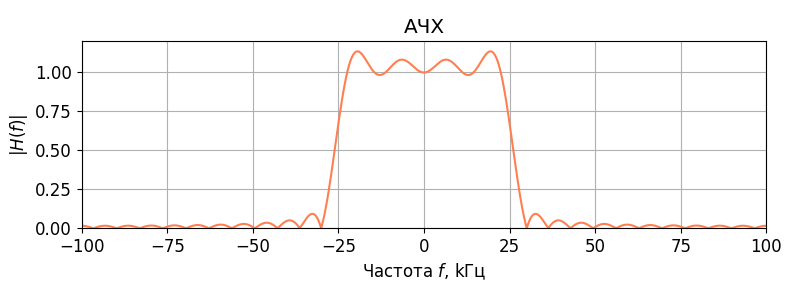

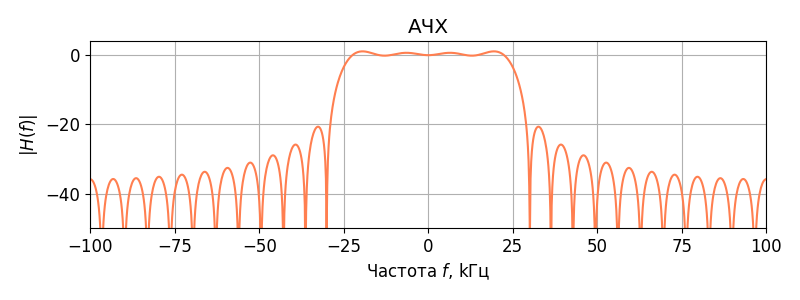

0.29598370732299495 0.34040812478297305 24804.6875


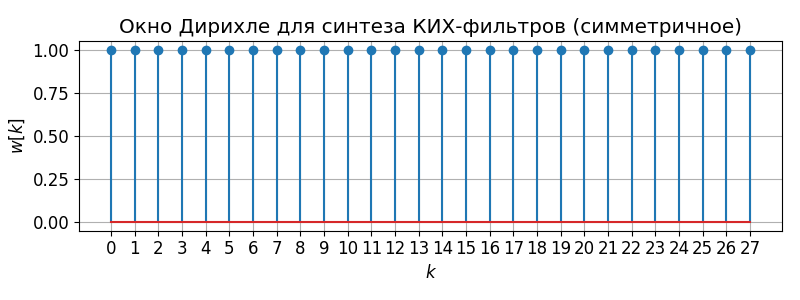

In [1135]:
R = 28
fc = (f1 + f2) / 2

w_rec = signal.windows.boxcar(R)
PlotWindow(w_rec, "Дирихле")

h = signal.firwin(numtaps = R + 1, cutoff = fc, window=('boxcar'), pass_zero='lowpass', fs=fs)
PlotFrequencyResponse(h, fs, f1, f2)


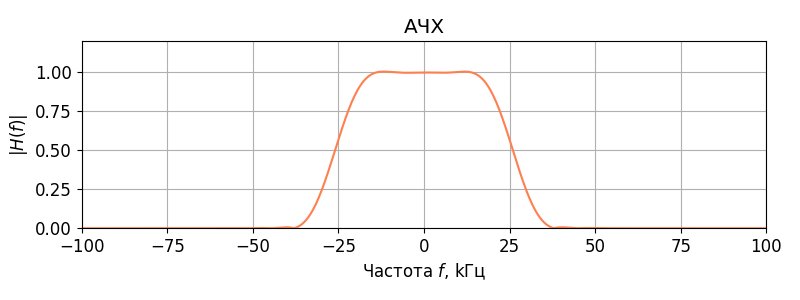

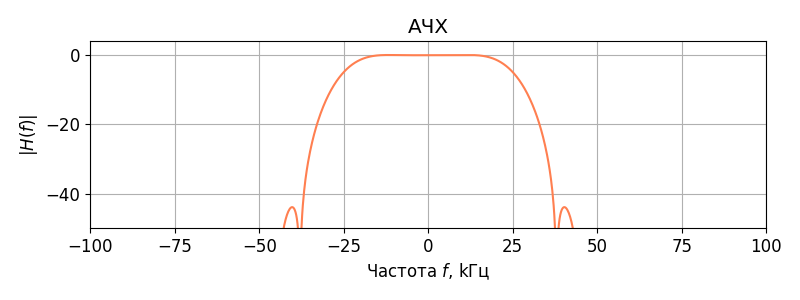

0.4171914663110129 0.4198525983540402 23046.875


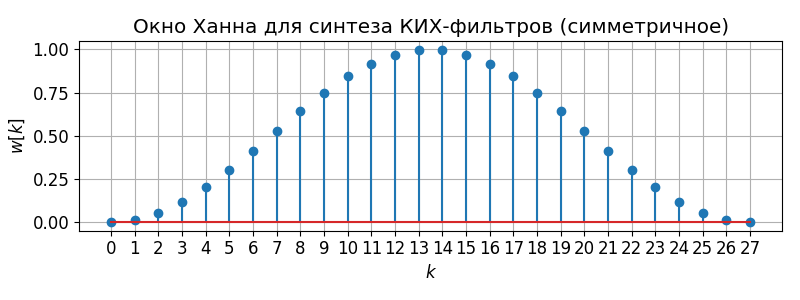

In [1136]:
R = 28
fc = (f1 + f2) / 2

w_rec = signal.windows.hann(R)
PlotWindow(w_rec, "Ханна")

h = signal.firwin(numtaps = R + 1, cutoff = fc, window=('hann'), pass_zero='lowpass', fs=fs)
PlotFrequencyResponse(h, fs, f1, f2)


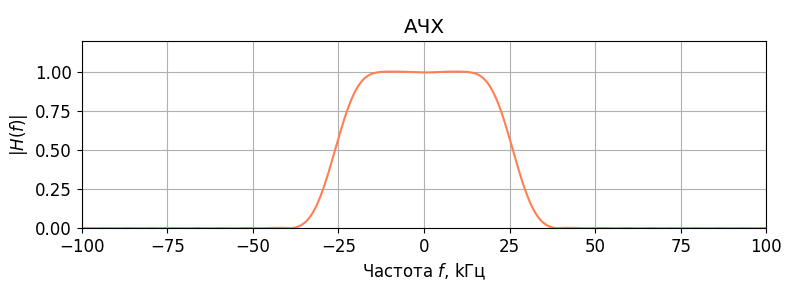

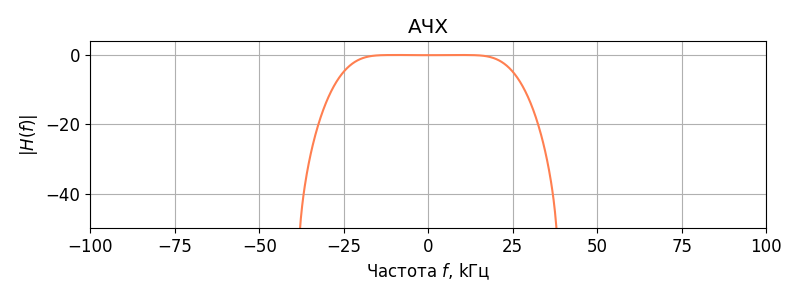

0.407839407233908 0.4137228801215662 23242.1875


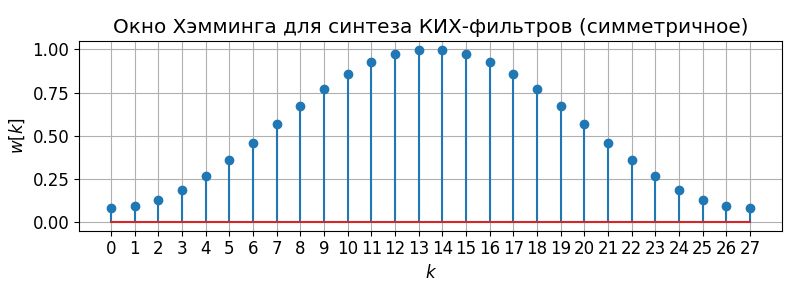

In [1137]:
R = 28
fc = (f1 + f2) / 2

w_rec = signal.windows.hamming(R)
PlotWindow(w_rec, "Хэмминга")

h = signal.firwin(numtaps = R + 1, cutoff = fc, window=('hamming'), pass_zero='lowpass', fs=fs)
PlotFrequencyResponse(h, fs, f1, f2)


In [1138]:
-20 * np.log10(0.41)


np.float64(7.744322865605291)

In [1139]:
# заполненние таблицы через pandas

plot_data = {}
plot_data["Окно Дирихле"]  = [" ", " "]
plot_data["Окно Ханна"]    = [" ", " "]
plot_data["Окно Хэмминга"] = [" ", " "]
plot_data["Окно Блэкмана"] = [" ", " "]

df2_1 = pd.DataFrame(data=plot_data, columns = plot_data.keys(),
            index=['Частота среза фильтра, Гц', 'Максимальный уровень пульсаций  фильтра, дБ'])
# генерировать markdown таблицу
# print(df2_1.to_markdown())
df2_1


,Окно Дирихле,Окно Ханна,Окно Хэмминга,Окно Блэкмана
"Частота среза фильтра, Гц",,,,
"Максимальный уровень пульсаций фильтра, дБ",,,,


### Задача 2.2. Синтез ФНЧ с окном Хемминга. 

Синтезировать КИХ-фильтр нижних частот с окном Хемминга наименьшего порядка при заданных требованиях к АЧХ:
* частота дискретизации $f_s$,
* граничная частота полосы пропускания $f_1$,
* граничная частота полосы задерживания $f_2$,
* максимально допустимое отклонение АЧХ в полосе пропускания $\delta_1$,
* максимально допустимое отклонение АЧХ в полосе задерживания $\delta_2$.

Воспользоваться следующей итерационной процедурой [1]:

1) Оценить длину окна по формуле 

$$\hat{N}=\left[\dfrac{3,3 f_s}{\Delta f} \right], \;\;  \Delta f=f_2-f_1$$

2) Взвесить импульсную характеристику идеального фильтра c ФЧХ $\varphi(\theta)=- \dfrac{R}{2} \theta$ окном Хэмминга выбранной длины (``scipy.firwin``, $f_c=(f_1+f_2)/2$).

$$h[k]=\left\{ \begin{matrix}
   {{h}_{\text{ideal}}}[k]w[k],  \\
   0,  \\
\end{matrix}\begin{matrix}
   \ \ 0\le k\le N-1;  \\
   \left\{ k<0 \right\}\cup \left\{ k\ge N \right\}.  \\
\end{matrix} \right.$$

$$w[k]=\left\{ \begin{matrix}
   0,54-0,46\cos \dfrac{2\pi k}{N-1}, & 0\le k\le N-1;  \\
   0, &\left\{ k<0 \right\}\cup \left\{ k\ge N \right\}. \\
\end{matrix} \right.$$

3) Проверить выполнение требований к АЧХ фильтра. Если требования не выполняются, следует увеличить порядок фильтра $R$ (на некоторое целое число) и перейти на п. 2. Если требования выполняются, то нужно уменьшить порядок фильтра  $R$ и перейти на п. 2. Уменьшение и увеличение порядка производится до тех пор, пока не будет найден минимальный порядок , при котором выполняются требования к АЧХ и уменьшение порядка на единицу приводит к нарушению требований к фильтру. 

Проверку требований к АЧХ можно произвести по графику, используя
* backend notebook `%matplotlib notebook` (в Jupyter Notebook)
* `plt.xlim()` и `plt.ylim()` (в Google Colab или в Jupyter Notebook)

Приведите графики АЧХ КИХ-фильтра с начальным ($\hat{R}=\hat{N}-1$) и конечным $R_{min}$ порядками в итерационной процедуре. 
______

[1] Солонина, А. И. Цифровая обработка сигналов в зеркале MATLAB : учебное пособие / А. И. Солонина .— Санкт-Петербург : БХВ-Петербург, 2021 .— 560 с. — (Учебная литература для вузов).

P.S. Есть в библиотеке МФТИ. 
______

In [1140]:
def PlotFrequencyResponseWithLimits(h, fs, f1, f2, delta1, delta2):
    M=1024
    H1=abs(np.fft.fftshift(np.fft.fft(h, M)))

    fs = fs/1e3
    f1 = f1/1e3
    f2 = f2/1e3

    plt.figure(figsize=[8, 8])
    plt.plot(fs*(np.arange(M)/M-0.5), H1, color='coral')

    plt.grid()
    plt.ylabel('$|H(f)|$')
    plt.xlabel('Частота $f$, kГц')
    plt.title('АЧХ')
    plt.ylim([0.0, 1.2])
    plt.fill([-f1,-f1, f1, f1], [0, 1-delta1, 1-delta1, 0], color='gray', lw=2, alpha=0.5)
    plt.fill([-fs/2,-fs/2, -f2, -f2], [delta2, 1.2, 1.2, delta2], color='gray', lw=2, alpha=0.5)
    plt.fill([f2,f2, fs/2, fs/2], [delta2, 1.2, 1.2, delta2], color='gray', lw=2, alpha=0.5)
    plt.fill([-f1,-f1, f1, f1], [1+delta1, 1.2, 1.2, 1+delta1], color='gray', lw=2, alpha=0.5)
    plt.xlim([0.8 * f1, 1.2 * f2])
    plt.tight_layout()
    plt.show()


330


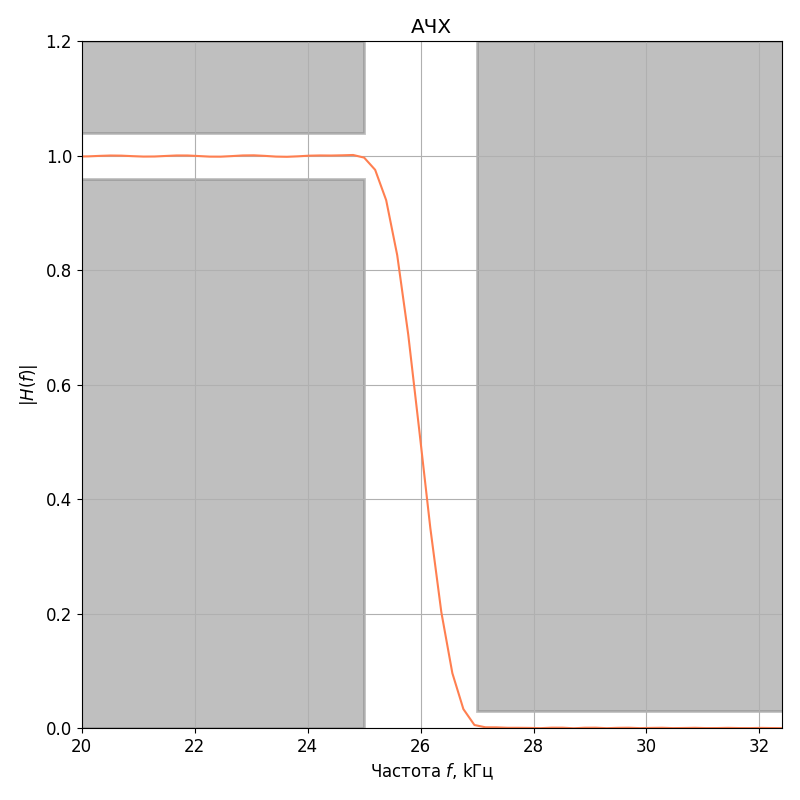

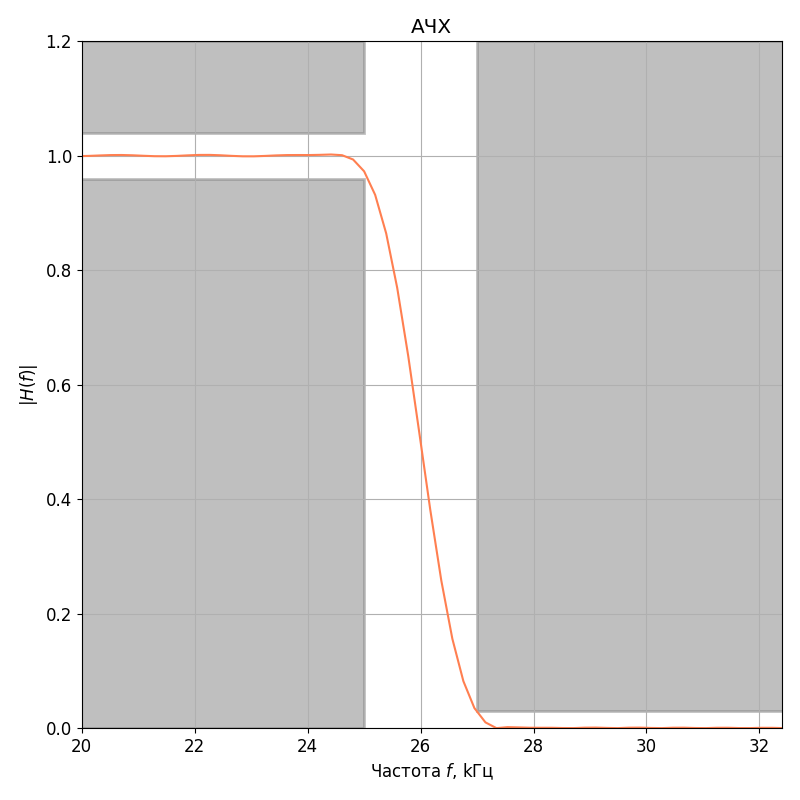

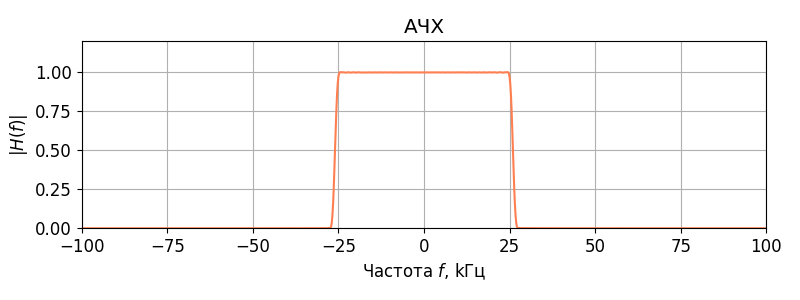

/var/folders/r1/lnw7h2g55yq12k_m4cnlhj0h0000gn/T/ipykernel_54704/1664234543.py:29: RuntimeWarning: divide by zero encountered in log10
  plt.plot(fs*(np.arange(M)/M-0.5)/1e3, 20*np.log10(H1), color='coral')


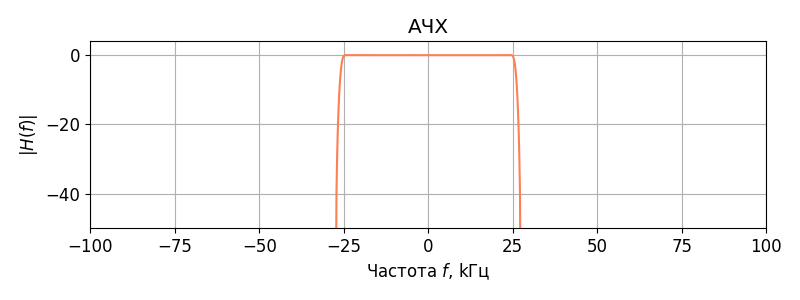

0.006445236427438328 0.010309675836200826 25781.25


In [1141]:
N0 = int(np.round(3.3 * fs / (f2 - f1)))
print(N0)

h = signal.firwin(numtaps = N0, cutoff = fc, window=('hamming'), pass_zero='lowpass', fs=fs)
PlotFrequencyResponseWithLimits(h, fs, f1, f2, delta1, delta2)

N1 = 260

h = signal.firwin(numtaps = N1, cutoff = fc, window=('hamming'), pass_zero='lowpass', fs=fs)
PlotFrequencyResponseWithLimits(h, fs, f1, f2, delta1, delta2)
PlotFrequencyResponse(h, fs, f1, f2)


## Задача 2.3. Синтез ФНЧ с окном Кайзера.

Синтезировать КИХ-фильтр нижних частот с окном Кайзера наименьшего порядка при заданных требованиях к АЧХ :
* частота дискретизации $f_s$,
* граничная частота полосы пропускания $f_1$,
* граничная частота полосы задерживания $f_2$,
* максимально допустимое отклонение АЧХ в полосе пропускания $\delta_1$,
* максимально допустимое отклонение АЧХ в полосе задерживания $\delta_2$.

Параметр $\beta$ и длину окна $N$ определить по эмпирическим формулам, приведенным в лекции, или с помощью функции `signal.kaiserord`. Привести график АЧХ получившегося фильтра, сравнить порядок с фильтром из задачи 2.2. 

158 2.1808956221464677


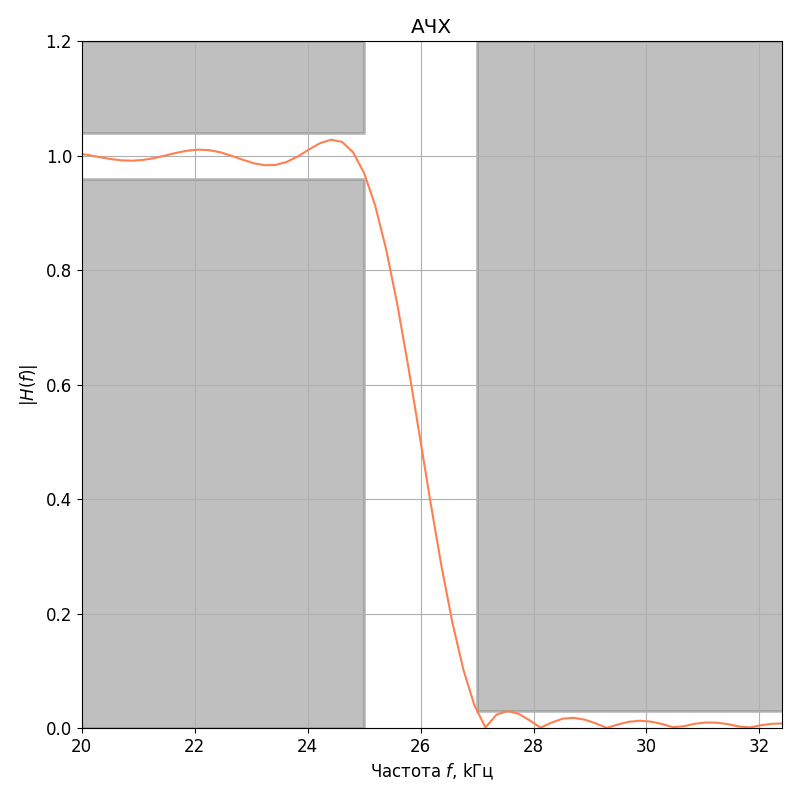

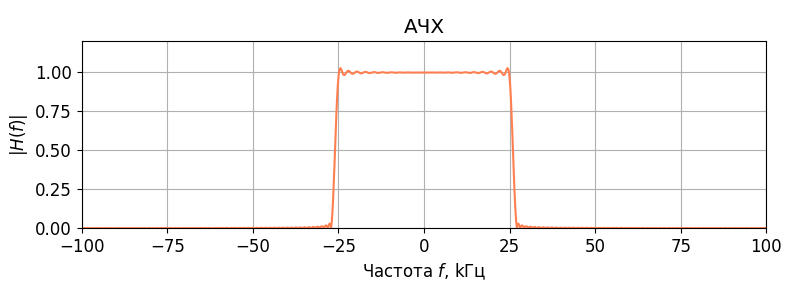

/var/folders/r1/lnw7h2g55yq12k_m4cnlhj0h0000gn/T/ipykernel_54704/1664234543.py:29: RuntimeWarning: divide by zero encountered in log10
  plt.plot(fs*(np.arange(M)/M-0.5)/1e3, 20*np.log10(H1), color='coral')


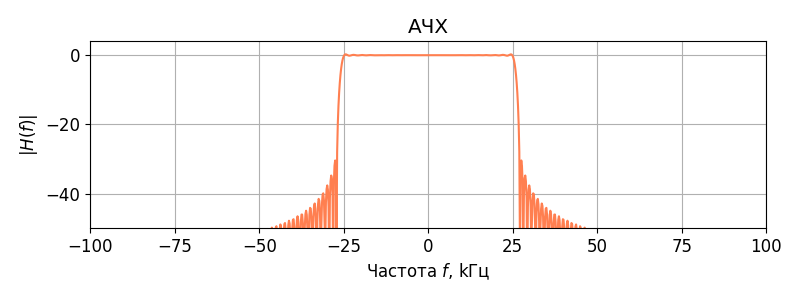

0.02811642866816144 0.030166774607172646 25781.25


In [1142]:
a = - 20 * np.log10(delta2)

N, betta = signal.kaiserord(a, (f2 - f1) / (0.5 * fs))
print(N, betta)

h = signal.firwin(numtaps = N, cutoff = fc, window=('kaiser', betta), pass_zero='lowpass', fs=fs)
PlotFrequencyResponseWithLimits(h, fs, f1, f2, delta1, delta2)
PlotFrequencyResponse(h, fs, f1, f2)


#  Модуль 3. Оптимизационные методы синтеза КИХ-фильтров

## Задача 3.1. Метод наименьших квадратов.

Синтезировать КИХ-фильтр методом наименьших квадратов наименьшего порядка при заданных требованиях к АЧХ :
* частота дискретизации $f_s$,
* граничная частота полосы пропускания $f_1$,
* граничная частота полосы задерживания $f_2$,
* максимально допустимое отклонение АЧХ в полосе пропускания $\delta_1$,
* максимально допустимое отклонение АЧХ в полосе задерживания $\delta_2$.

Использовать следующую итерационную процедуру:

1) Выбрать начальный порядок фильтра $R$ (например, можно взять результат решения задачи 2.3).

2) Используя функцию `scipy.signal.firls`, синтезировать КИХ-фильтр порядка $R$ методом наименьших квадратов.

3) Проверить выполнение требований к АЧХ фильтра. Если требования не выпоняются, следует увеличить порядок фильтра $R$ (на некоторое целое число) и перейти на п. 2. Если требования выполняются, то нужно уменьшить порядок фильтра  $R$ и перейти на п. 2. Уменьшение и увеличение порядка производится до тех пор, пока не будет найден минимальный порядок , при котором выполняются требования к АЧХ и уменьшение порядка на единицу приводит к нарушению требований к фильтру. 

Приведите график АЧХ КИХ-фильтра минимального порядка $R_{\min}$ в итерационной процедуре. 

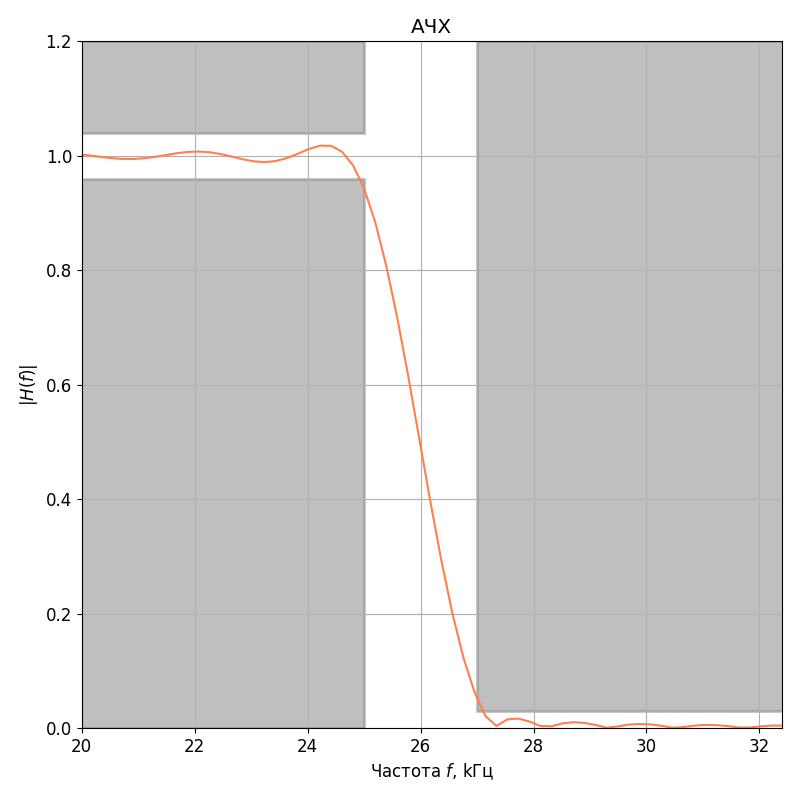

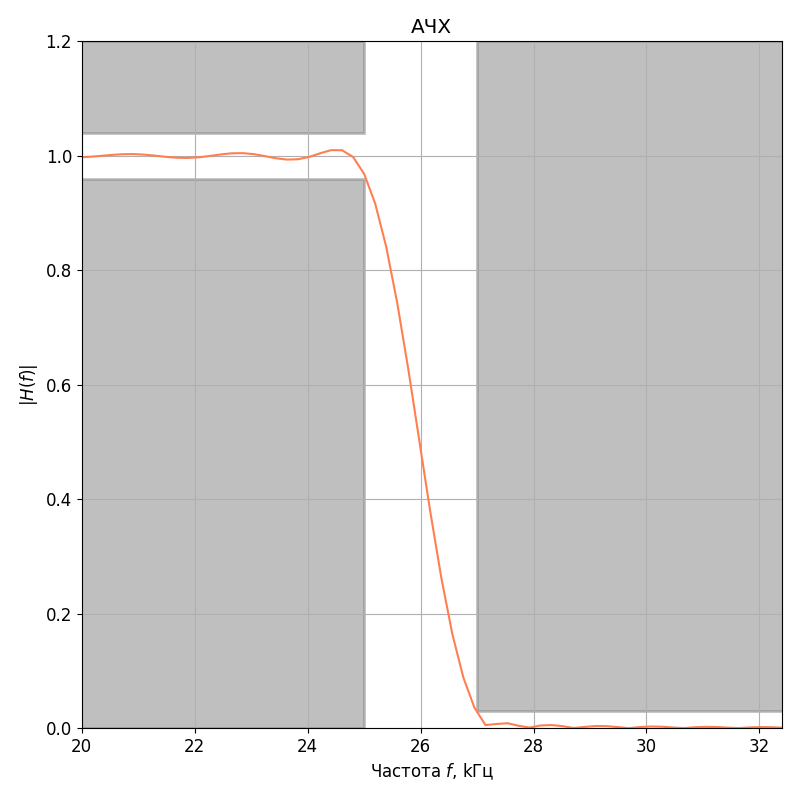

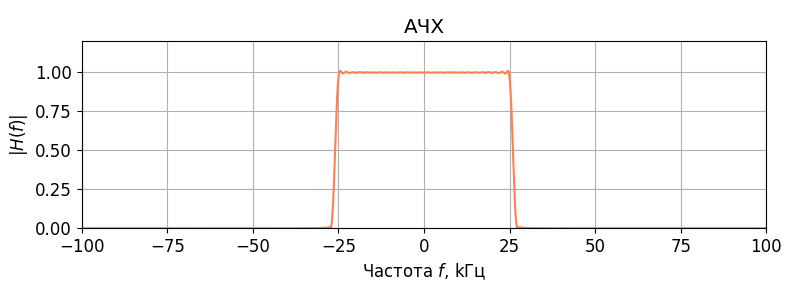

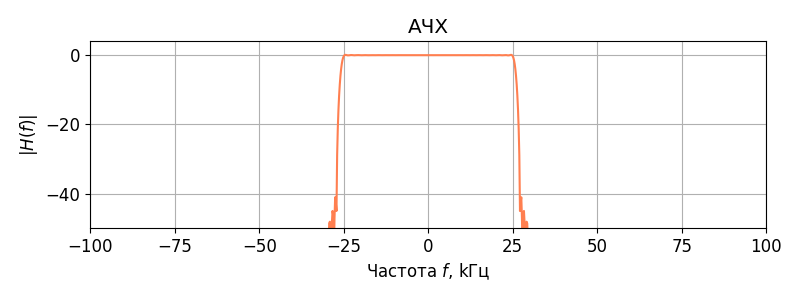

0.009919275425592566 0.008865635839213409 25781.25


In [1143]:
N0 = 159

k = delta2 / delta1

bands = np.array([0, f1, f2, fs/2])
desired = np.array([1, 1, 0, 0])
weight = np.array([k, 1])

h = signal.firls(numtaps=N0, bands=bands, desired=desired, weight=weight, fs=fs)
PlotFrequencyResponseWithLimits(h, fs, f1, f2, delta1, delta2)

N = 199

h = signal.firls(numtaps=N, bands=bands, desired=desired, weight=weight, fs=fs)
PlotFrequencyResponseWithLimits(h, fs, f1, f2, delta1, delta2)
PlotFrequencyResponse(h, fs, f1, f2)


## Задача 3.2. Метод равномерной чебышевской аппроксимации.

Синтезировать КИХ-фильтр методом равномерной чебышевской аппроксимации наименьшего порядка при заданных требованиях к АЧХ :
* частота дискретизации $f_s$,
* граничная частота полосы пропускания $f_1$,
* граничная частота полосы задерживания $f_2$,
* максимально допустимое отклонение АЧХ в полосе пропускания $\delta_1$,
* максимально допустимое отклонение АЧХ в полосе задерживания $\delta_2$.

Использовать следующую итерационную процедуру:

1) Выбрать начальный порядок фильтра $R$ (например, можно взять результат решения задачи 2.3).

2) Используя функцию `scipy.signal.remez`, синтезировать КИХ-фильтр порядка $R$ методом наименьших квадратов.

3) Проверить выполнение требований к АЧХ фильтра. Если требования не выпоняются, следует увеличить порядок фильтра $R$ (на некоторое целое число) и перейти на п. 2. Если требования выполняются, то нужно уменьшить порядок фильтра  $R$ и перейти на п. 2. Уменьшение и увеличение порядка производится до тех пор, пока не будет найден минимальный порядок , при котором выполняются требования к АЧХ и уменьшение порядка на единицу приводит к нарушению требований к фильтру. 

Приведите график АЧХ КИХ-фильтра минимального порядка $R_{min}$ в итерационной процедуре. 

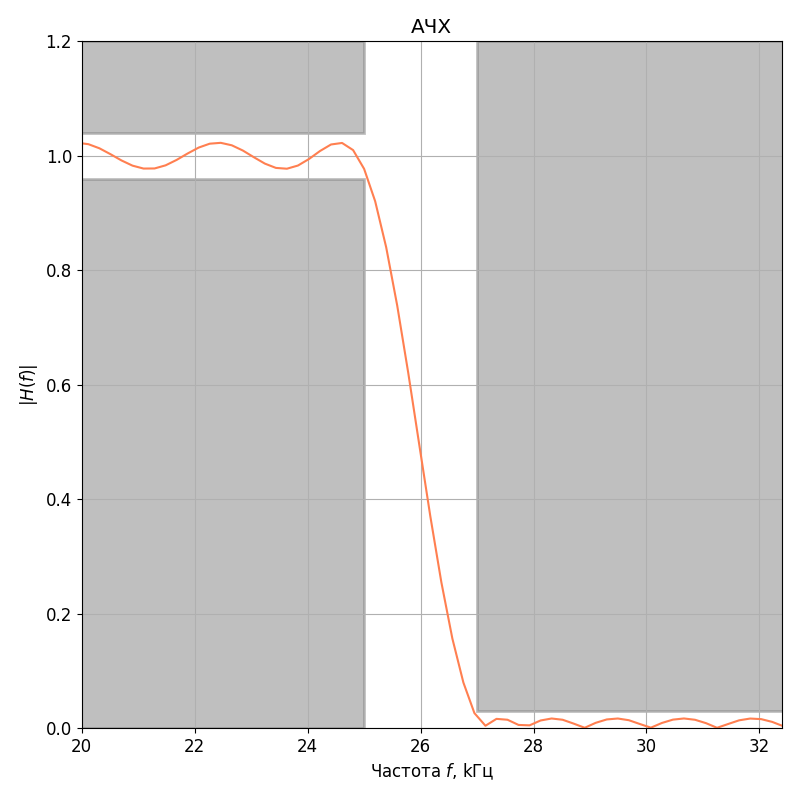

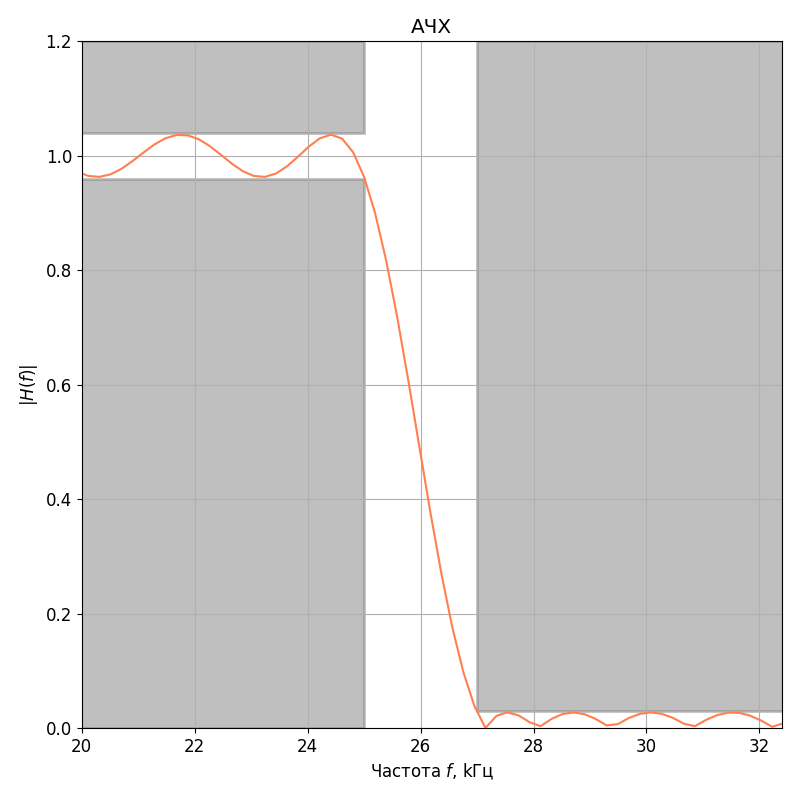

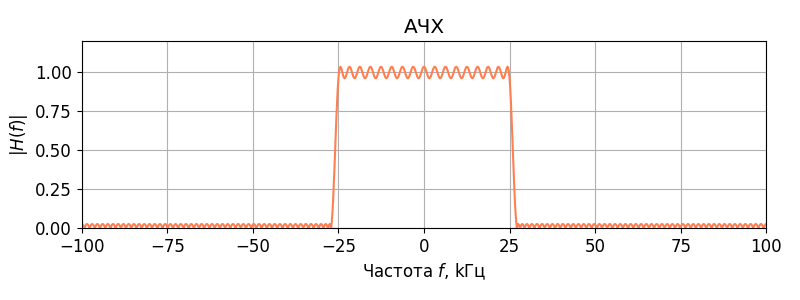

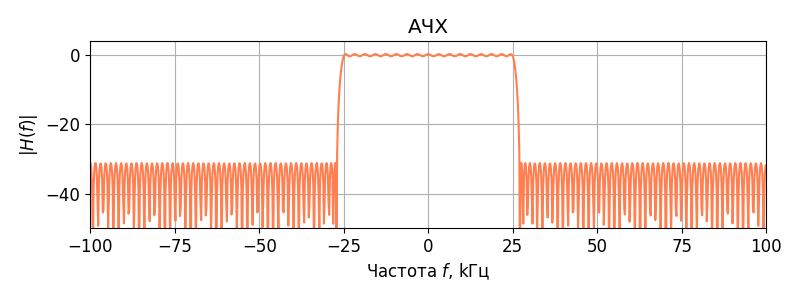

0.03702562290871936 0.02780457548401516 25781.25


In [1144]:
N0 = 158

k = delta2 / delta1

bands = np.array([0, f1, f2, fs/2])
desired = np.array([1, 0])
weight = np.array([k, 1])

h = signal.remez(numtaps=N0, bands=bands, desired=desired, weight=weight, fs=fs)
PlotFrequencyResponseWithLimits(h, fs, f1, f2, delta1, delta2)

N = 133

h = signal.remez(numtaps=N, bands=bands, desired=desired, weight=weight, fs=fs)
PlotFrequencyResponseWithLimits(h, fs, f1, f2, delta1, delta2)
PlotFrequencyResponse(h, fs, f1, f2)


## Задача 3.3. Сравнение результатов.

Сравнить минимальные порядки КИХ-фильтров, которые получились в задачах 2.2, 2.3, 3.1 и 3.2. Заполнить таблицу. Определить, будут ли выполняться требование из этих задач для фильтра минимального из получившихся порядков, построенного методом частотной выборки (как в задаче 1.2).


In [1145]:
# заполненние таблицы через pandas
import pandas as pd
plot_data = {}
plot_data["Оконный метод (окно Хэмминга)"]  = [" ", " "]
plot_data["Оконный метод (окно Кайзера)"]    = [" ", " "]
plot_data["Метод наименьших квадратов"] = [" ", " "]
plot_data["Метод равномерной чебышевской аппроксимации"] = [" ", " "]

df3_3 = pd.DataFrame(data=plot_data, columns = plot_data.keys(),
            index=["$$R_\{min}$$", "$$N_\{min}$$"]).T
# генерировать markdown таблицу
# print(df3_3.to_markdown())
df3_3


<>:10: SyntaxWarning: invalid escape sequence '\{'
<>:10: SyntaxWarning: invalid escape sequence '\{'
<>:10: SyntaxWarning: invalid escape sequence '\{'
<>:10: SyntaxWarning: invalid escape sequence '\{'
/var/folders/r1/lnw7h2g55yq12k_m4cnlhj0h0000gn/T/ipykernel_54704/1488241849.py:10: SyntaxWarning: invalid escape sequence '\{'
  index=["$$R_\{min}$$", "$$N_\{min}$$"]).T
/var/folders/r1/lnw7h2g55yq12k_m4cnlhj0h0000gn/T/ipykernel_54704/1488241849.py:10: SyntaxWarning: invalid escape sequence '\{'
  index=["$$R_\{min}$$", "$$N_\{min}$$"]).T


,$$R_\{min}$$,$$N_\{min}$$
Оконный метод (окно Хэмминга),,
Оконный метод (окно Кайзера),,
Метод наименьших квадратов,,
Метод равномерной чебышевской аппроксимации,,


#  Модуль 4. Фильтрация сигнала.

## Задача 4.1. Фильтрация АМ-сигнала, полученного с помощью цифрового осциллографа.
Установить в управляющей программе цифрового осциллографа следующие параметры. 
* Число выборок 1000, режим "Нормально".
* Пробник "х1".
* Частота дискретизации 100 кГц (Время/дел 1mS) или 200 кГц (Время/дел 0,5mS) в соответствии с вариантом задания. 
* Синхронизация "Вкл." и "Авто".
* Генератор: Генератор: режим "АМ/ЧМ", вид "~", диапазон "10K", размах колебания 4В. Частоту генератора выбрать в соответствии с вариантом из таблицы. Установить частоту несущей $f_0$ в соответствии с вариантом задания. 
* Модуляция генератора (меню "Настройки"): режим "АМ", коэффициент модуляции 70%, модулирующая частота 1кГц. 

Выполнить следующую последовательность действий. 
1) Пронаблюдать сигнал с амплитудной модуляцией. 
2) Записать выборки в текстовый файл.
3) Синтезировать КИХ-фильтр одним из рассмотренных методов так, чтобы его АЧХ удовлетворяла условиям задачи. При этом не обязательно использовать фильтр наименьшего возможного порядка. 
4) Провести фильтрацию сигнала. Сравнить сигналы и спектры сигналов до и после фильтрации.
5) Определить групповую задержку фильтра в мс. 
6) Синтезировать БИХ-фильтр Баттерворта, удовлетворяющий тем же требованиям. Сравнить результаты фильтрации сигналов КИХ-фильтром и БИХ-фильтром во временной области.

In [ ]:
def parse_oscilloscope_file(file_path):
    metadata = {}
    measurements = {'N': [], 'Smpl.': [], 'Trig': []}

    with open(file_path, 'r') as file:
        lines = [line.strip() for line in file.readlines() if line.strip()]

    for line in lines[1:4]:
        key, value = line.split(' = ')

        if key == 'Zero level':
            value = value.replace(',', '.').split()[0]
            unit = ""
        else:
            value, unit = value.replace(',', '.').split()[0:2]

        metadata[key] = float(value) if key != 'Zero level' else int(value)

        if unit == 'uS':
            metadata[key] *= 1e-6
        elif unit == 'nS':
            metadata[key] *= 1e-9
        elif unit == 'mS':
            metadata[key] *= 1e-3
        elif unit == 'mV':
            metadata[key] *= 1e-3

    header_index = next(i for i, line in enumerate(lines) if line.startswith('N'))

    for line in lines[header_index + 1:]:
        parts = line.split()
        if len(parts) == 3:
            try:
                measurements['N'].append(int(parts[0]))
                measurements['Smpl.'].append(int(parts[1]))
                measurements['Trig'].append(int(parts[2]))
            except ValueError:
                continue

    return metadata, measurements

def analyse(fs, signal_lev, window='boxcar'):
    figsize=[8,4]
    plt.rcParams['font.size'] = '12'
    window = signal.get_window(window, Nx=len(signal_lev), fftbins=True)
    signal_lev = signal_lev*window
    plt.figure(figsize=figsize)
    plt.plot(np.arange(signal_lev.size)/fs*1e3, signal_lev, '.-')
    plt.title("Сигнал")
    plt.xlabel("$t$, мc")
    plt.ylabel("$x(k\Delta t)w[k]$, В")
    plt.grid()
    plt.tight_layout()
    Xn = np.fft.fftshift(np.fft.fft(signal_lev, 2**18))
    f = fs*np.linspace(-0.5, 0.5, num=Xn.size, endpoint=False)
    plt.show()

    plt.figure(figsize=figsize)
    plt.title("ДВПФ (модуль), линейный масштаб")
    plt.plot(f/1e3, abs(Xn))
    plt.grid()
    plt.xlabel("$f$, кГц")
    plt.ylabel("$|X(f)|$")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=figsize)
    maxXn=max(abs(Xn))
    plt.title("ДВПФ (модуль), дБ")
    plt.plot(f/1e3, 20*np.log10(abs(Xn)/maxXn))
    plt.grid()
    plt.xlabel("$f$, кГц")
    plt.ylabel("АЧХ, дБ")
    plt.tight_layout()
    plt.show()

def group_delay_plot(beta, alpha, fs=1):
    f, gd = signal.group_delay((beta, alpha), w=np.linspace(-fs/2, fs/2, num=2048), fs=fs)
    plt.figure(figsize=[8, 3])
    ax = plt.axes()
    plt.title('Групповая задержка фильтра')
    gd_mseconds=gd/fs*1e3
    plt.plot(f*1e-3, gd_mseconds, 'C3')
    plt.ylabel('$\\tau_{{гр}}$, мc')
    plt.xlim([-fs*1e-3*0.5, fs*1e-3*0.5])
    plt.ylim([0.0, max(gd_mseconds)*1.1])
    plt.xlabel('$f$, кГц')
    plt.grid()
    plt.tight_layout()

def compare(fs, signals=[], vline=None):
    figsize=[8,4]
    plt.figure(figsize=figsize)
    for color_index, signal_lev in enumerate(signals):
        plt.plot(np.arange(signal_lev.size)/fs*1e3, signal_lev, '.-', color="C%i" %color_index)
    plt.title("Сигнал")
    plt.xlabel("$t$, мc")
    plt.ylabel("$x(k\Delta t)w[k]$, В")
    plt.grid()
    if not(vline is None):
        plt.axvline(x=vline*1e3, color='r')
    plt.tight_layout()


<>:51: SyntaxWarning: invalid escape sequence '\D'
<>:98: SyntaxWarning: invalid escape sequence '\D'
<>:51: SyntaxWarning: invalid escape sequence '\D'
<>:98: SyntaxWarning: invalid escape sequence '\D'
/var/folders/r1/lnw7h2g55yq12k_m4cnlhj0h0000gn/T/ipykernel_54704/3640959516.py:51: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel("$x(k\Delta t)w[k]$, В")
/var/folders/r1/lnw7h2g55yq12k_m4cnlhj0h0000gn/T/ipykernel_54704/3640959516.py:98: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel("$x(k\Delta t)w[k]$, В")


In [1147]:
k = delta2 / delta1

bands = np.array([0, f1, f2, fs/2])
desired = np.array([1, 0])
weight = np.array([k, 1])

N = 133

h = signal.remez(numtaps=N, bands=bands, desired=desired, weight=weight, fs=fs)

M=1024
H=abs(np.fft.fftshift(np.fft.fft(h, M)))


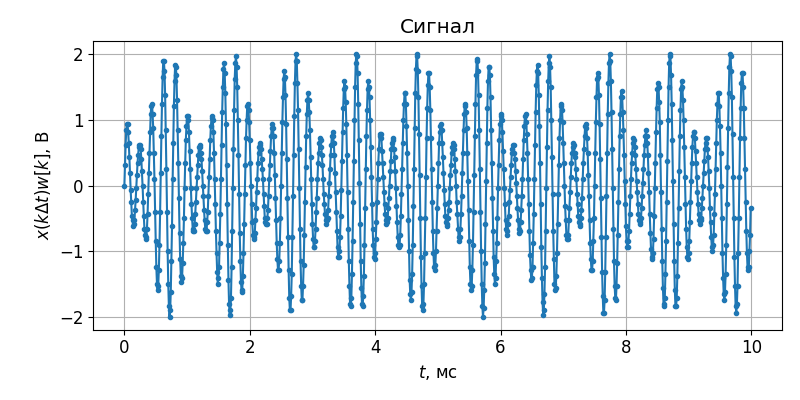

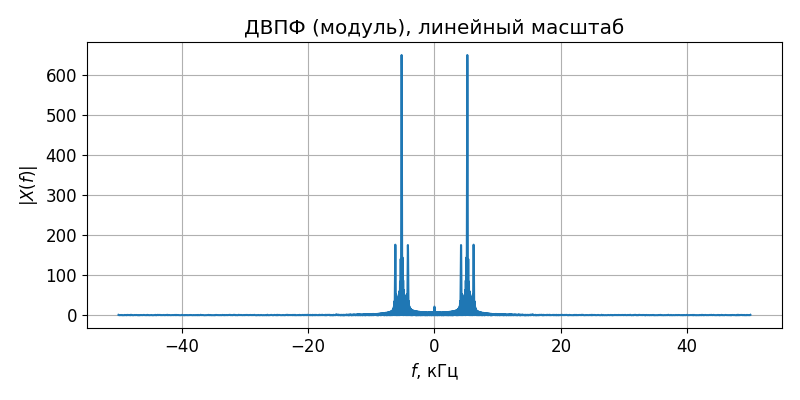

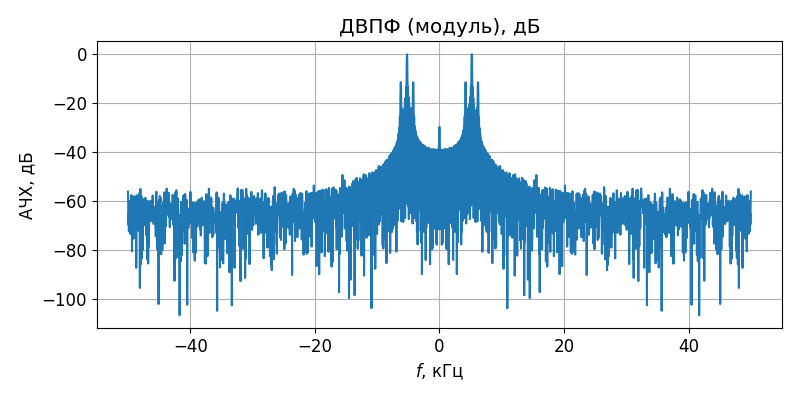

In [1148]:
metadata, measurements = parse_oscilloscope_file("modulation_data.txt")

zero_level = metadata["Zero level"]

fs = 1 / metadata["Time step"]
W = (np.array(measurements['Smpl.']) - zero_level) * metadata['Voltage step']

analyse(fs, W)


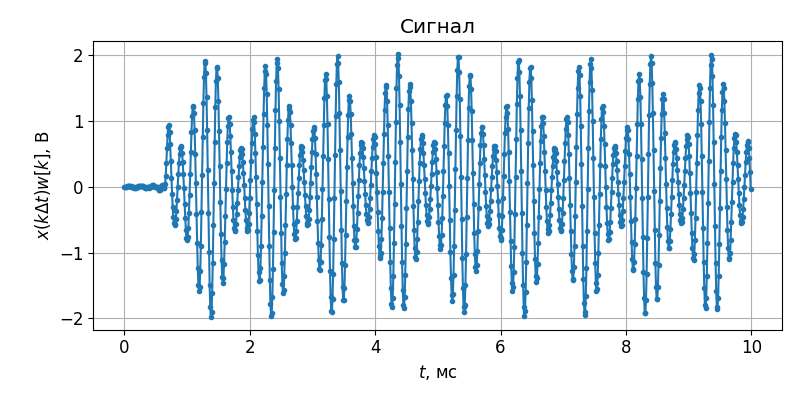

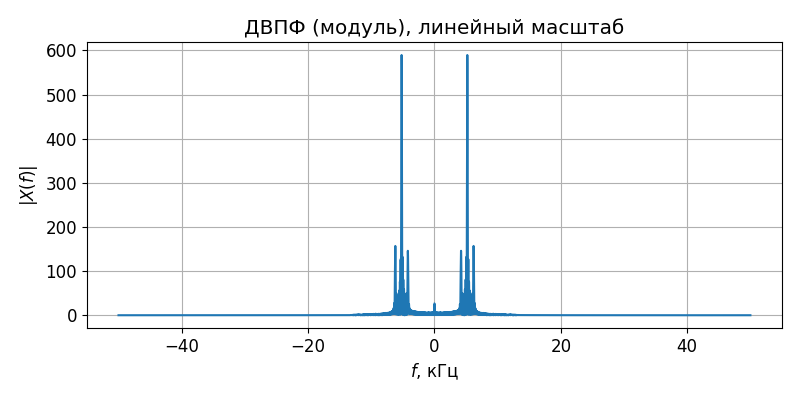

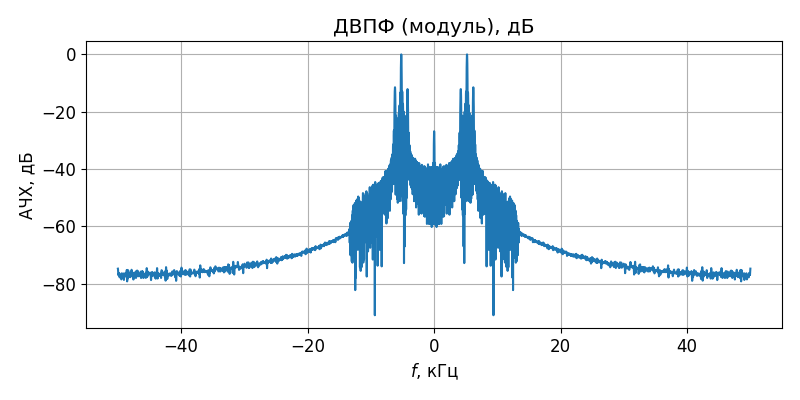

In [1149]:
signal_output = signal.lfilter(b=h, a=[1], x=W, zi=None)

analyse(fs, signal_output)


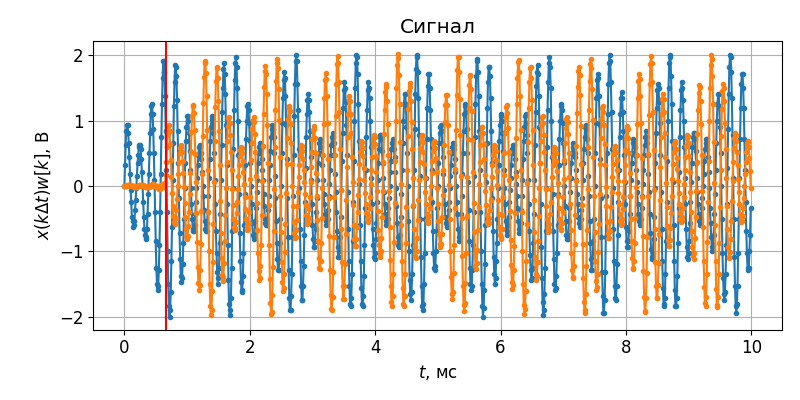

In [1150]:
compare(fs, signals=[W, signal_output], vline=(N-1)/2.0/fs)
